<span style="font-family: Arial; font-size: 18pt; display: block;text-align: center;">**Superstore Data Analysis Model**</span>
<span style="font-family: Arial; font-size: 12pt; display: block;text-align: center;">**Najwa km , Entri Elevate, 16-august-2024**</span>

<span style="font-family: Arial; font-size: 14pt;">**Introduction:**</span>


<span style="font-family: Arial; font-size: 10pt;">This dataset contains detailed information about sales orders processed by a company. Each record in the dataset represents an individual sales order and includes several attributes related to the order’s processing, shipment, and customer details. The dataset is structured to provide insights into various aspects of sales performance and customer behavior.</span>

<span style="font-family: Arial; font-size: 14pt;">**Problem Statement:** </span>-------------------------------------

<span style="font-family: Arial; font-size: 10pt;">There are several problem statements to address various business challenges and opportunities.The company seeks to understand how different factors influence overall sales performance to optimize revenue and profitability.The goal is to identify key drivers of sales and profit, assess the impact of discounts and shipping costs, and evaluate the effectiveness of different shipping modes and order priorities.These will help us to lead to actionable insights, improved decision-making, and enhanced business performance.The analysis of this dataset will also help the company to better understand its sales, customer behaviors, regional performance etc leading to more informed and strategic business decisions.And to find out the weak area where bussiness manager should work to make more sales by exploring data. </span>

<span style="font-family: Arial; font-size: 14pt;">**Objectives:** </span>


1. **Explore Relationships**:
    - Investigate the relationship between sales performance, customer insights, operational efficiency, and geographical sales trends.
2. **Predict Future Sales**:
    - Develop a predictive model to forecast future sales based on historical data.
3. **Evaluate Predictive Model**:
    - Assess the performance of the predictive model using appropriate metrics.

**Data Description:**
- Source: Kaggle
- Features: [order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region
  ,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year]

<span style="font-family: Arial; font-size: 14pt;">**Data Collection:** </span>

In [91]:
pip install openpyxl numpy pandas matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [93]:
import pandas as pd
import zipfile

# Path to the ZIP file
zip_file_path = r'C:\Users\Najwa\Desktop\main pro\SuperStore_Orders.csv.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List files in the ZIP archive
    zip_ref.printdir()
    
    # Extract the CSV file name (assuming there's only one CSV file)
    csv_file_name = zip_ref.namelist()[0]
    
    # Read the CSV file directly from the ZIP archive
    with zip_ref.open(csv_file_name) as csv_file:
        # Try reading with different encodings
        try:
            data = pd.read_csv(csv_file, encoding='utf-8')
        except UnicodeDecodeError:
            print("UTF-8 decoding failed, trying latin-1.")
            csv_file.seek(0)  # Reset file pointer to beginning
            try:
                data = pd.read_csv(csv_file, encoding='latin-1')
            except UnicodeDecodeError:
                print("latin-1 decoding failed, trying iso-8859-1.")
                csv_file.seek(0)  # Reset file pointer to beginning
                try:
                    data = pd.read_csv(csv_file, encoding='iso-8859-1')
                except UnicodeDecodeError:
                    print("iso-8859-1 decoding failed, trying windows-1252.")
                    csv_file.seek(0)  # Reset file pointer to beginning
                    try:
                        data = pd.read_csv(csv_file, encoding='windows-1252')
                    except UnicodeDecodeError:
                        print("windows-1252 decoding failed. Please check the file encoding.")

File Name                                             Modified             Size
SuperStore_Orders.csv                          2021-07-08 08:09:08     10963592
UTF-8 decoding failed, trying latin-1.


In [94]:
data.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0,106,35,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0,36,10,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0,30,8,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0,-26,5,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0,38,5,Medium,2011


In [95]:
data.tail(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0,5,1,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0,0,0,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0,12,0,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0,1,0,Medium,2014
51289,CA-2014-156720,31-12-2014,04-01-2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0,-1,0,Medium,2014


### Dimensions of data

In [96]:
print (data.shape)

(51290, 21)


***Number of columns are 21 and rows are 51290***

In [97]:
df = data.iloc[:20000, :]
print(df.shape)

(20000, 21)


***Number of columns are 21 and rows are 20000***

In [98]:
print (df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')


### Categorical Column

In [99]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'order_priority'],
      dtype='object')


### Category types in data

In [100]:
df["category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

### Number of products in each category

In [101]:
df["category"].value_counts()

category
Office Supplies    12171
Technology          4011
Furniture           3818
Name: count, dtype: int64

### Total number of products in all categories

In [102]:
df["category"].value_counts().sum()

20000

### Number of sub_categories

In [103]:
df["sub_category"].nunique()

17

### Number of products in each sub-category

In [104]:
df["sub_category"].value_counts()

sub_category
Binders        2349
Storage        1996
Art            1916
Paper          1369
Phones         1349
Chairs         1305
Furnishings    1239
Accessories    1204
Labels         1025
Bookcases       939
Supplies        937
Fasteners       936
Envelopes       933
Copiers         859
Appliances      710
Machines        599
Tables          335
Name: count, dtype: int64

### Types of region

In [105]:
df["region"].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

### Type of ship modes

In [106]:
df["ship_mode"].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

### Unique Market

In [107]:
df["market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

### Number of unique values in each column

In [108]:
df.nunique()

order_id           9809
order_date          711
ship_date           735
ship_mode             4
customer_name       795
segment               3
state               916
country             141
market                7
region               13
product_id         8272
category              3
sub_category         17
product_name       3532
sales              1662
quantity             14
discount             27
profit            12316
shipping_cost      6207
order_priority        4
year                  3
dtype: int64

### Data Types

In [109]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

***Dtype of order date,ship date and sales is object***

### Dataset Information

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        20000 non-null  object 
 1   order_date      20000 non-null  object 
 2   ship_date       20000 non-null  object 
 3   ship_mode       20000 non-null  object 
 4   customer_name   20000 non-null  object 
 5   segment         20000 non-null  object 
 6   state           20000 non-null  object 
 7   country         20000 non-null  object 
 8   market          20000 non-null  object 
 9   region          20000 non-null  object 
 10  product_id      20000 non-null  object 
 11  category        20000 non-null  object 
 12  sub_category    20000 non-null  object 
 13  product_name    20000 non-null  object 
 14  sales           20000 non-null  object 
 15  quantity        20000 non-null  int64  
 16  discount        20000 non-null  float64
 17  profit          20000 non-null 

***Dataset doesnot contain any null values.***

# Data Preprocessing

### Number of non-numeric value in sales column

In [111]:
# Step 1: Convert the 'sales' column to numeric, coercing errors to NaN
df['sales_numeric'] = pd.to_numeric(df['sales'], errors='coerce')

# Step 2: Count the number of non-numeric values (NaN values) in the 'sales_numeric' column
non_numeric_count = df['sales_numeric'].isna().sum()

# Display the count
print(f"There are {non_numeric_count} non-numeric values in the 'sales' column.")


There are 1037 non-numeric values in the 'sales' column.


C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\1527968907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales_numeric'] = pd.to_numeric(df['sales'], errors='coerce')


#### Identifying non numeric values of sales column

In [112]:
# Identify non-numeric values in the 'sales' column
non_numeric_sales = df[~df['sales'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]

# Display a sample of non-numeric values
sample_non_numeric_sales = non_numeric_sales['sales'].head(10)
print(sample_non_numeric_sales)

27     1,648
43     3,029
58     2,574
83     2,479
84     2,174
100    2,875
125    1,384
126    1,323
163    1,200
173    1,326
Name: sales, dtype: object


***Here the sales column is having dtype of object because values appear to be numeric but are represented in a format that includes commas as thousand separators*** 

#### Handling of sales column

In [113]:
# Remove commas and convert the 'sales' column to numeric
df['sales'] = df['sales'].replace({',': ''}, regex=True)
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

# Find the data type of the 'sales' column
sales_dtype = df['sales'].dtype
print(f'Sales datatype is :{sales_dtype}')

Sales datatype is :int64


C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\2923784151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = df['sales'].replace({',': ''}, regex=True)
C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\2923784151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [114]:
df = df.drop(columns=['sales_numeric'])

### Check for missing value

In [115]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


***There is no missing values***

### Stastical summary of data

In [116]:
#describe the dataset
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
df.describe(percentiles=percentiles)


,sales,quantity,discount,profit,shipping_cost,year
count,20000,20000,20000,20000,20000,20000
mean,248,3,0,28,26,2012
std,492,2,0,162,58,1
min,1,1,0,-3702,0,2011
1%,4,1,0,-363,0,2011
25%,31,2,0,0,3,2011
50%,86,3,0,9,8,2012
75%,252,5,0,37,24,2012
95%,1025,8,1,212,113,2012
99%,2301,11,1,581,286,2012


### Conversion of data types of order date and ship date

In [117]:
print(df['order_date'].head(10))
print(df['ship_date'].head(10))

0    01-01-2011
1    01-01-2011
2    01-01-2011
3    01-01-2011
4    01-01-2011
5    01-01-2011
6    02-01-2011
7    03-01-2011
8    03-01-2011
9    03-01-2011
Name: order_date, dtype: object
0    06-01-2011
1    08-01-2011
2    05-01-2011
3    05-01-2011
4    08-01-2011
5    08-01-2011
6    06-01-2011
7    03-01-2011
8    09-01-2011
9    07-01-2011
Name: ship_date, dtype: object


In [118]:
# Convert the 'order_date' and 'ship_date' columns to datetime format with day first
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True, errors='coerce')

# Check the format of 'order_date' and 'ship_date' columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        20000 non-null  object        
 1   order_date      20000 non-null  datetime64[ns]
 2   ship_date       20000 non-null  datetime64[ns]
 3   ship_mode       20000 non-null  object        
 4   customer_name   20000 non-null  object        
 5   segment         20000 non-null  object        
 6   state           20000 non-null  object        
 7   country         20000 non-null  object        
 8   market          20000 non-null  object        
 9   region          20000 non-null  object        
 10  product_id      20000 non-null  object        
 11  category        20000 non-null  object        
 12  sub_category    20000 non-null  object        
 13  product_name    20000 non-null  object        
 14  sales           20000 non-null  int64         
 15  qu

In [119]:
print(df['order_date'].head(10))
print(df['ship_date'].head(10))

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
5   2011-01-01
6   2011-01-02
7   2011-01-03
8   2011-01-03
9   2011-01-03
Name: order_date, dtype: datetime64[ns]
0   2011-01-06
1   2011-01-08
2   2011-01-05
3   2011-01-05
4   2011-01-08
5   2011-01-08
6   2011-01-06
7   2011-01-03
8   2011-01-09
9   2011-01-07
Name: ship_date, dtype: datetime64[ns]


In [120]:
# Extract year, month, and day from order_date
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day

# Extract year, month, and day from ship_date
df['ship_year'] = df['ship_date'].dt.year
df['ship_month'] = df['ship_date'].dt.month
df['ship_day'] = df['ship_date'].dt.day

# Display the updated DataFrame to verify
print(df[['order_date', 'order_year', 'order_month', 'order_day', 
          'ship_date', 'ship_year', 'ship_month', 'ship_day']].head())

  order_date  order_year  order_month  order_day  ship_date  ship_year  \
0 2011-01-01        2011            1          1 2011-01-06       2011   
1 2011-01-01        2011            1          1 2011-01-08       2011   
2 2011-01-01        2011            1          1 2011-01-05       2011   
3 2011-01-01        2011            1          1 2011-01-05       2011   
4 2011-01-01        2011            1          1 2011-01-08       2011   

   ship_month  ship_day  
0           1         6  
1           1         8  
2           1         5  
3           1         5  
4           1         8  


In [121]:
# Drop the 'order_date' and 'ship_date' columns
df = df.drop(columns=['order_date', 'ship_date'])

# Verify the columns have been dropped
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ... profit shipping_cost  order_priority  year  \
0  Office Supplies  ...    106            35          Medium  2011   
1  Office Supplies  ...     36            

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        20000 non-null  object 
 1   ship_mode       20000 non-null  object 
 2   customer_name   20000 non-null  object 
 3   segment         20000 non-null  object 
 4   state           20000 non-null  object 
 5   country         20000 non-null  object 
 6   market          20000 non-null  object 
 7   region          20000 non-null  object 
 8   product_id      20000 non-null  object 
 9   category        20000 non-null  object 
 10  sub_category    20000 non-null  object 
 11  product_name    20000 non-null  object 
 12  sales           20000 non-null  int64  
 13  quantity        20000 non-null  int64  
 14  discount        20000 non-null  float64
 15  profit          20000 non-null  float64
 16  shipping_cost   20000 non-null  float64
 17  order_priority  20000 non-null 

### Number of varaibles in each data types


In [123]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
order_id          0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
order_year        0
order_month       0
order_day         0
ship_year         0
ship_month        0
ship_day          0
dtype: int64


In [124]:
# Identify categorical variables
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

# Identify integer variables (int64 or int32)
int_ = (df.dtypes == 'int64') | (df.dtypes == 'int32')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

# Identify float variables
fl = (df.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 13
Integer variables: 9
Float variables: 3


### Number of duplicate value

In [125]:
df.duplicated().sum()

0

### Check Unique Values for each variable.

In [126]:
# Check Unique Values for each variable.
unique_vals =df.apply(lambda col: col.unique())
print(unique_vals)
print('*'*20)
print('Unique Values Count')
print(df.apply(lambda col: col.nunique()))

order_id          [AG-2011-2040, IN-2011-47883, HU-2011-1220, IT...
ship_mode         [Standard Class, Second Class, Same Day, First...
customer_name     [Toby Braunhardt, Joseph Holt, Annie Thurman, ...
segment                          [Consumer, Home Office, Corporate]
state             [Constantine, New South Wales, Budapest, Stock...
country           [Algeria, Australia, Hungary, Sweden, Canada, ...
market                  [Africa, APAC, EMEA, EU, Canada, LATAM, US]
region            [Africa, Oceania, EMEA, North, Canada, Southea...
product_id        [OFF-TEN-10000025, OFF-SU-10000618, OFF-TEN-10...
category                   [Office Supplies, Furniture, Technology]
sub_category      [Storage, Supplies, Paper, Furnishings, Machin...
product_name      [Tenex Lockers, Blue, Acme Trimmer, High Speed...
sales             [408, 120, 66, 45, 114, 55, 314, 276, 912, 667...
quantity            [2, 3, 4, 5, 1, 7, 6, 8, 9, 10, 11, 12, 14, 13]
discount          [0.0, 0.1, 0.5, 0.4, 0.45, 0.5

## Handle outliers

In [127]:
#shape before outlier treatment
df.shape

(20000, 25)

#### Identifying outliers

***Box Plot (visual method)***

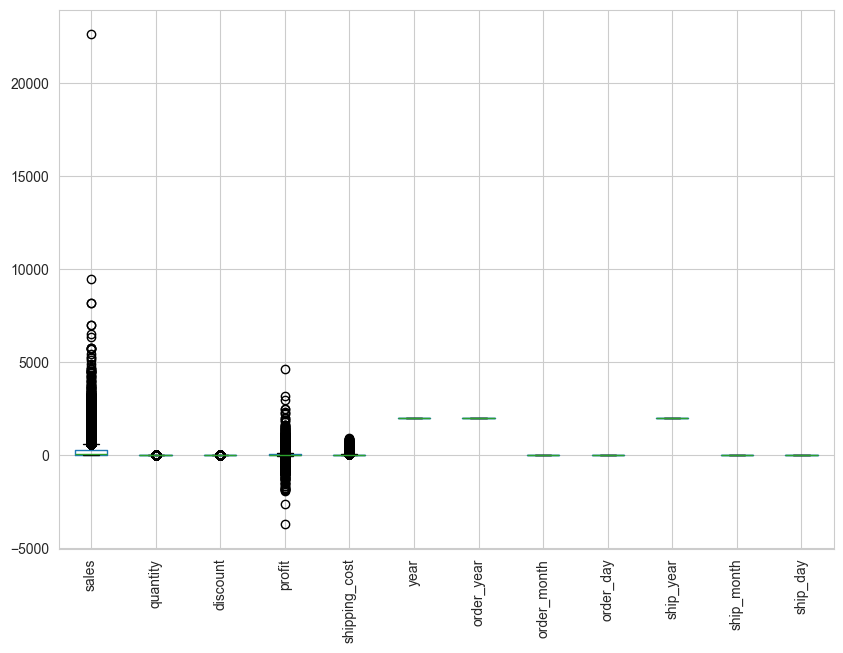

In [128]:
plt.figure(figsize=(10,7))
df.boxplot()
plt.xticks(rotation='vertical')
plt.show()

***IQR Method(Statistical method)***

In [129]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns

# Initialize a dictionary to store the number of outliers for each column
outlier_counts = {}

# Loop over each numerical column to calculate the number of outliers
for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Count the number of outliers
    num_outliers = outliers.sum()
    
    # Store the count of outliers in the dictionary
    outlier_counts[col] = num_outliers

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Number of outliers for each feature:
sales: 2236
quantity: 349
discount: 1696
profit: 3857
shipping_cost: 2389
year: 0
order_year: 0
order_month: 0
order_day: 0
ship_year: 0
ship_month: 0
ship_day: 0


In [130]:
import numpy as np

# Check if there are any non-positive values
if (df['quantity'] <= 0).any():
    # Add 1 to avoid taking log of zero or negative values
    df['quantity_log'] = np.log(df['quantity'] + 1)
else:
    # Apply natural log transformation
    df['quantity_log'] = np.log(df['quantity'])

# Check the result
print(df[['quantity', 'quantity_log']].head())

   quantity  quantity_log
0         2             1
1         3             1
2         4             1
3         3             1
4         5             2


In [131]:
# Calculate skewness for the original 'quantity' column
skew_quantity = df['quantity'].skew()

# Calculate skewness for the log-transformed 'quantity_log' column
skew_quantity_log = df['quantity_log'].skew()

print(f"Skewness of 'quantity': {skew_quantity}")
print(f"Skewness of 'quantity_log': {skew_quantity_log}")

Skewness of 'quantity': 1.373561234364987
Skewness of 'quantity_log': -0.06797857331226219


In [132]:
# Drop the original 'quantity' column
df = df.drop(columns=['quantity'])

# Rename 'quantity_log' to 'quantity'
df = df.rename(columns={'quantity_log': 'quantity'})

# Verify the change
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ... shipping_cost order_priority  year  order_year  \
0  Office Supplies  ...            35         Medium  2011        2011   
1  Office Supplies  ...           

In [133]:
df.head()

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,...,shipping_cost,order_priority,year,order_year,order_month,order_day,ship_year,ship_month,ship_day,quantity
0,AG-2011-2040,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,...,35,Medium,2011,2011,1,1,2011,1,6,1
1,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,...,10,Medium,2011,2011,1,1,2011,1,8,1
2,HU-2011-1220,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,...,8,High,2011,2011,1,1,2011,1,5,1
3,IT-2011-3647632,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,...,5,High,2011,2011,1,1,2011,1,5,1
4,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,...,5,Medium,2011,2011,1,1,2011,1,8,2


In [134]:
import numpy as np

# Ensure there are no negative values in 'discount'
if (df['discount'] < 0).any():
    raise ValueError("The 'discount' column contains negative values, which are not suitable for square root transformation.")

# Apply the square root transformation
df['discount_sqrt'] = np.sqrt(df['discount'])

# Check the result
print(df[['discount', 'discount_sqrt']].head())

   discount  discount_sqrt
0         0              0
1         0              0
2         0              0
3         0              1
4         0              0


In [135]:
# Calculate skewness for the original 'quantity' column
skew_quantity = df['discount'].skew()

# Calculate skewness for the log-transformed 'quantity_log' column
skew_quantity_log = df['discount_sqrt'].skew()

print(f"Skewness of 'discount': {skew_quantity}")
print(f"Skewness of 'discount_sqrt': {skew_quantity_log}")

Skewness of 'discount': 1.4010471176605737
Skewness of 'discount_sqrt': 0.7376551841943856


In [136]:
# Drop the original 'quantity' column
df = df.drop(columns=['discount'])

# Rename 'quantity_log' to 'quantity'
df = df.rename(columns={'discount_sqrt': 'discount'})

# Verify the change
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ... order_priority  year  order_year  order_month  \
0  Office Supplies  ...         Medium  2011        2011            1   
1  Office Supplies  ...         Medi

In [137]:
import numpy as np

# Check if there are any non-positive values
if (df['sales'] <= 0).any():
    # Add 1 to avoid taking log of zero or negative values
    df['sales_log'] = np.log(df['sales'] + 1)
else:
    # Apply natural log transformation
    df['sales_log'] = np.log(df['sales'])

# Check the result
print(df[['sales', 'sales_log']].head())

   sales  sales_log
0    408          6
1    120          5
2     66          4
3     45          4
4    114          5


In [138]:
# Calculate skewness for the original 'quantity' column
skew_quantity = df['sales'].skew()

# Calculate skewness for the log-transformed 'quantity_log' column
skew_quantity_log = df['sales_log'].skew()

print(f"Skewness of 'sales': {skew_quantity}")
print(f"Skewness of 'sales_log': {skew_quantity_log}")

Skewness of 'sales': 9.21606424492736
Skewness of 'sales_log': 0.06324205448918013


In [139]:
# Drop the original 'quantity' column
df = df.drop(columns=['sales'])

# Rename 'quantity_log' to 'quantity'
df = df.rename(columns={'sales_log': 'sales'})

# Verify the change
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ...  year order_year  order_month  order_day ship_year  \
0  Office Supplies  ...  2011       2011            1          1      2011   
1  Office Supplies  ...  2

In [140]:
import numpy as np

# Check if there are any non-positive values
if (df['shipping_cost'] <= 0).any():
    # Add 1 to avoid taking log of zero or negative values
    df['shipping_cost_log'] = np.log(df['shipping_cost'] + 1)
else:
    # Apply natural log transformation
    df['shipping_cost_log'] = np.log(df['shipping_cost'])

# Check the result
print(df[['shipping_cost', 'shipping_cost_log']].head())

   shipping_cost  shipping_cost_log
0             35                  4
1             10                  2
2              8                  2
3              5                  2
4              5                  2


In [141]:
# Calculate skewness for the original 'quantity' column
skew_quantity = df['shipping_cost'].skew()

# Calculate skewness for the log-transformed 'quantity_log' column
skew_quantity_log = df['shipping_cost_log'].skew()

print(f"Skewness of 'shipping_cost': {skew_quantity}")
print(f"Skewness of 'shipping_cost_log': {skew_quantity_log}")

Skewness of 'shipping_cost': 6.024885796256851
Skewness of 'shipping_cost_log': 0.5097278285230427


In [142]:
# Drop the original 'quantity' column
df = df.drop(columns=['shipping_cost'])

# Rename 'quantity_log' to 'quantity'
df = df.rename(columns={'shipping_cost_log': 'shipping_cost'})

# Verify the change
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ... order_year order_month  order_day ship_year  \
0  Office Supplies  ...       2011           1          1      2011   
1  Office Supplies  ...       2011      

In [143]:
negative_profit_values = df['profit'][df['profit'] < 0]
print(negative_profit_values)

3        -26
8       -319
10      -123
11       -70
14       -96
        ... 
19962    -32
19978    -20
19984    -36
19988    -34
19992    -82
Name: profit, Length: 4916, dtype: float64


In [144]:
num_negative_profits = (df['profit'] < 0).sum()
print(f"Number of negative values in 'profit': {num_negative_profits}")

Number of negative values in 'profit': 4916


In [145]:
import numpy as np

# Create a new column for positive profits (keeping negatives as 0)
df['profit_only'] = df['profit'].apply(lambda x: x if x > 0 else 0)

# Create a new column for losses (keeping positives as 0)
df['loss_only'] = df['profit'].apply(lambda x: -x if x < 0 else 0)

# Check the new columns
print(df[['profit_only', 'loss_only']].head())

   profit_only  loss_only
0          106          0
1           36          0
2           30          0
3            0         26
4           38          0


In [146]:
# Rename the columns
# Drop the original profit column
df.drop('profit', axis=1, inplace=True)

df.rename(columns={'profit_only': 'profit', 'loss_only': 'loss'}, inplace=True)

# Check the dataframe to ensure the changes
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ... order_day ship_year ship_month  ship_day  quantity  \
0  Office Supplies  ...         1      2011          1         6         1   
1  Office Supplies  ...   

In [147]:
import numpy as np

# Handle zeros by replacing them with a small positive value (e.g., 1)
df['profit'] = df['profit'].replace(0, 1)
df['loss'] = df['loss'].replace(0, 1)

# Apply log transformation
df['profit_log'] = np.log(df['profit'])
df['loss_log'] = np.log(df['loss'])

# Check the transformed columns
print(df[['profit_log', 'loss_log']].head())

   profit_log  loss_log
0           5         0
1           4         0
2           3         0
3           0         3
4           4         0


In [148]:
# Drop the original profit column
df.drop('profit', axis=1, inplace=True)
df.drop('loss', axis=1, inplace=True)
df.rename(columns={'profit_log': 'profit', 'loss_log': 'loss'}, inplace=True)

# Check the dataframe to ensure the changes
print(df.head())

          order_id       ship_mode    customer_name      segment  \
0     AG-2011-2040  Standard Class  Toby Braunhardt     Consumer   
1    IN-2011-47883  Standard Class      Joseph Holt     Consumer   
2     HU-2011-1220    Second Class    Annie Thurman     Consumer   
3  IT-2011-3647632    Second Class     Eugene Moren  Home Office   
4    IN-2011-47883  Standard Class      Joseph Holt     Consumer   

             state    country  market   region        product_id  \
0      Constantine    Algeria  Africa   Africa  OFF-TEN-10000025   
1  New South Wales  Australia    APAC  Oceania   OFF-SU-10000618   
2         Budapest    Hungary    EMEA     EMEA  OFF-TEN-10001585   
3        Stockholm     Sweden      EU    North   OFF-PA-10001492   
4  New South Wales  Australia    APAC  Oceania   FUR-FU-10003447   

          category  ... order_day ship_year ship_month  ship_day  quantity  \
0  Office Supplies  ...         1      2011          1         6         1   
1  Office Supplies  ...   

In [149]:
df.head()

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,...,order_day,ship_year,ship_month,ship_day,quantity,discount,sales,shipping_cost,profit,loss
0,AG-2011-2040,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,...,1,2011,1,6,1,0,6,4,5,0
1,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,...,1,2011,1,8,1,0,5,2,4,0
2,HU-2011-1220,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,...,1,2011,1,5,1,0,4,2,3,0
3,IT-2011-3647632,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,...,1,2011,1,5,1,1,4,2,0,3
4,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,...,1,2011,1,8,2,0,5,2,4,0


In [150]:
df.duplicated().sum()

0

In [151]:
from scipy.stats import skew
for col in numerical_columns:
    print (col)
    print (skew(df[col]))

sales
0.06323731123627425
quantity
-0.06797347481304353
discount
0.7375998589029443
profit
0.25727840313766925
shipping_cost
0.5096895981394257
year
-0.161888530185281
order_year
-0.161888530185281
order_month
-0.37445018799776136
order_day
-0.005297445454613432
ship_year
-0.0590207232049221
ship_month
-0.3756406289006206
ship_day
-0.0003584940378502852


## Visualisation of data

### Heat Map

               year  quantity  discount  sales  shipping_cost  profit  loss
year              1        -0        -0      0             -0       0    -0
quantity         -0         1         0      0              0       0     0
discount         -0         0         1     -0             -0      -1     1
sales             0         0        -0      1              1       1     0
shipping_cost    -0         0        -0      1              1       1     0
profit            0         0        -1      1              1       1    -1
loss             -0         0         1      0              0      -1     1


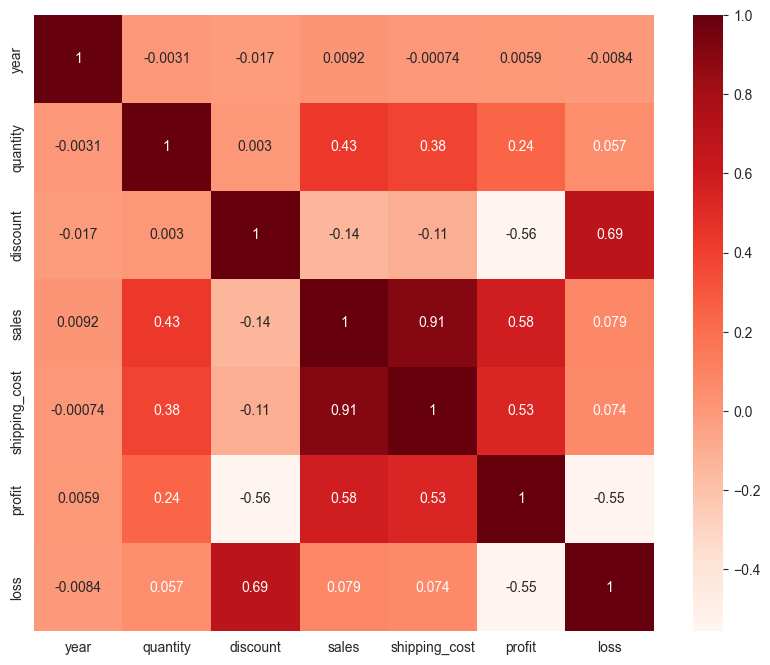

In [152]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix =  numerical_data.corr()
print(correlation_matrix)
sns.heatmap(numerical_data.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

#### Numerical distribution of columns

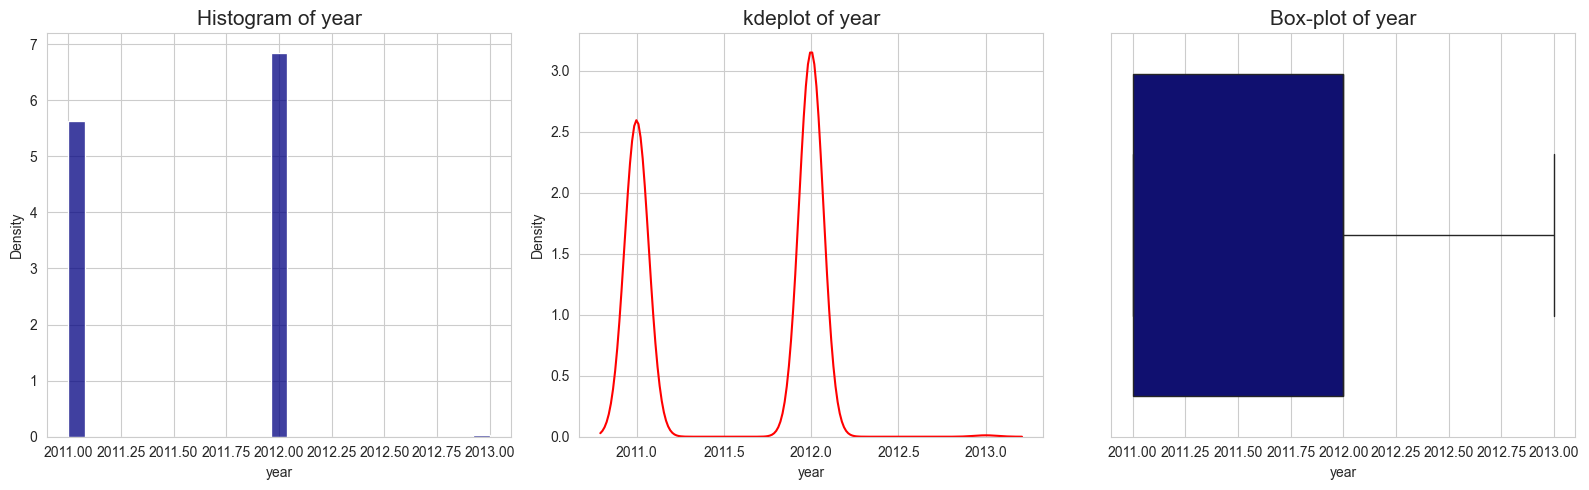

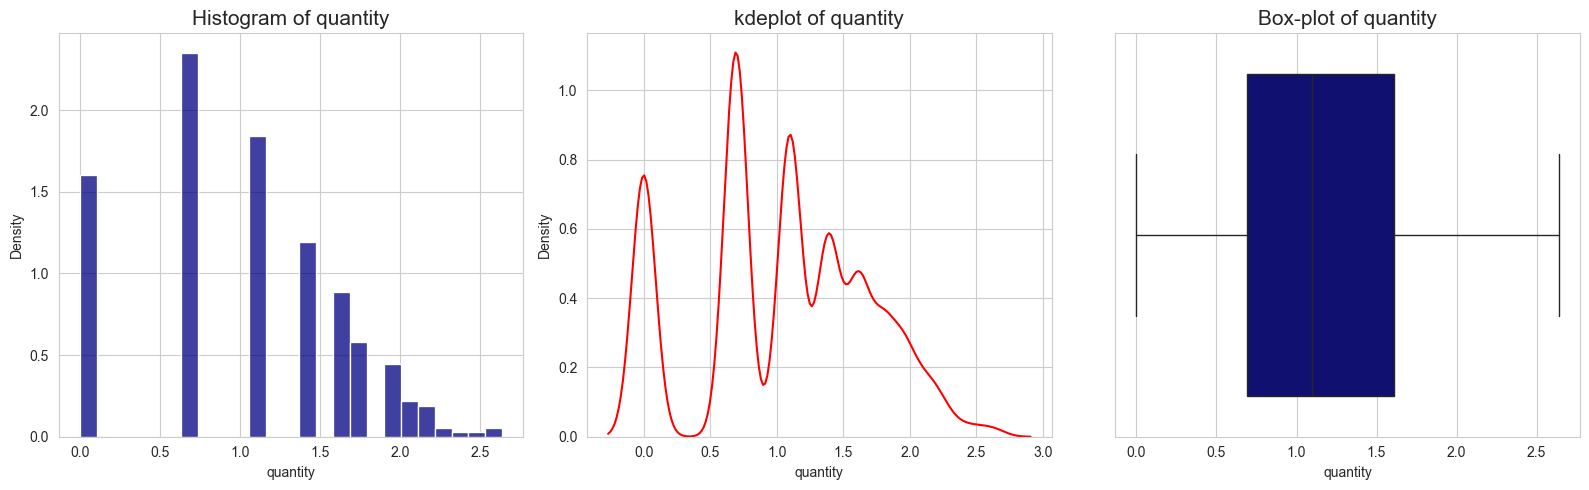

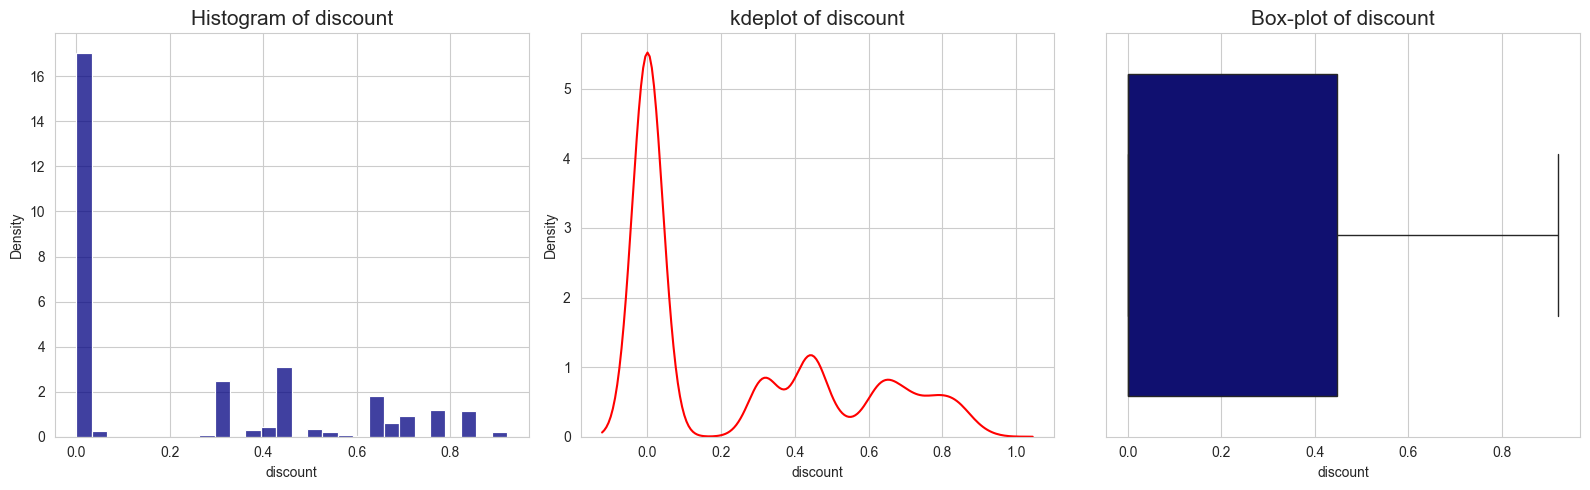

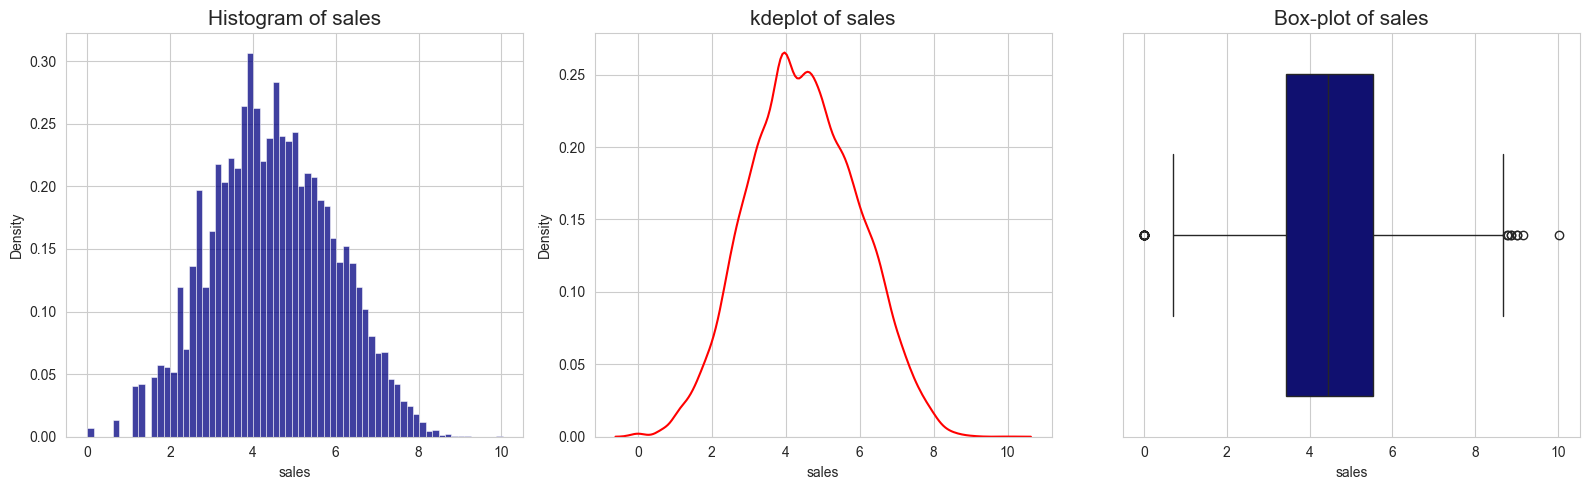

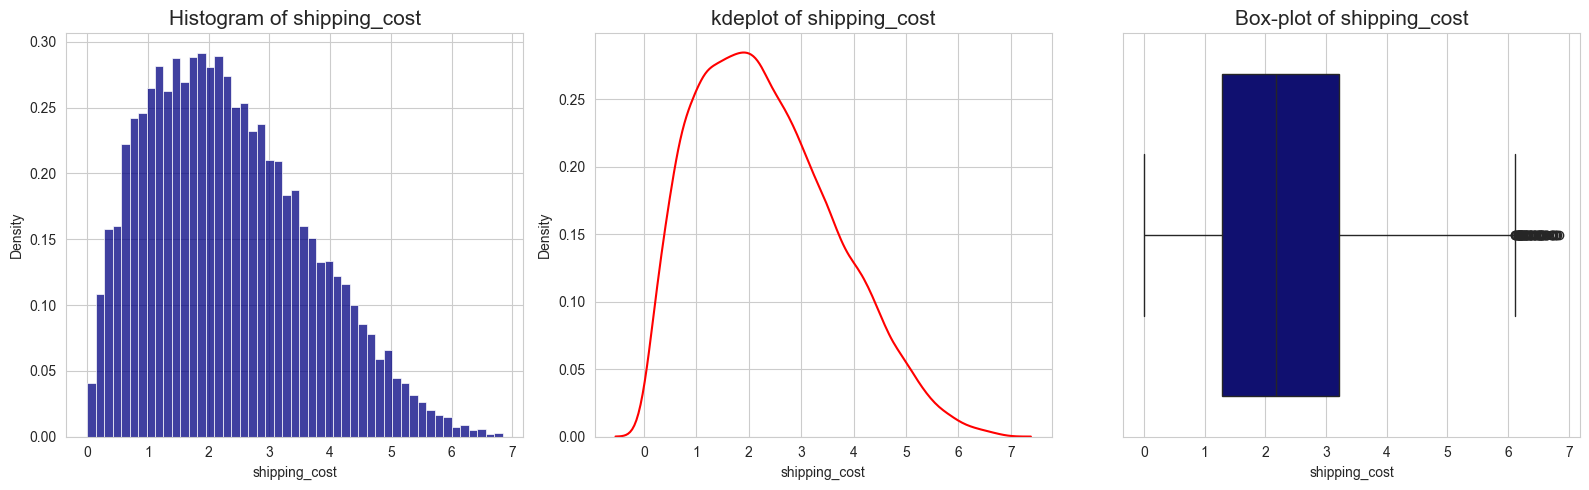

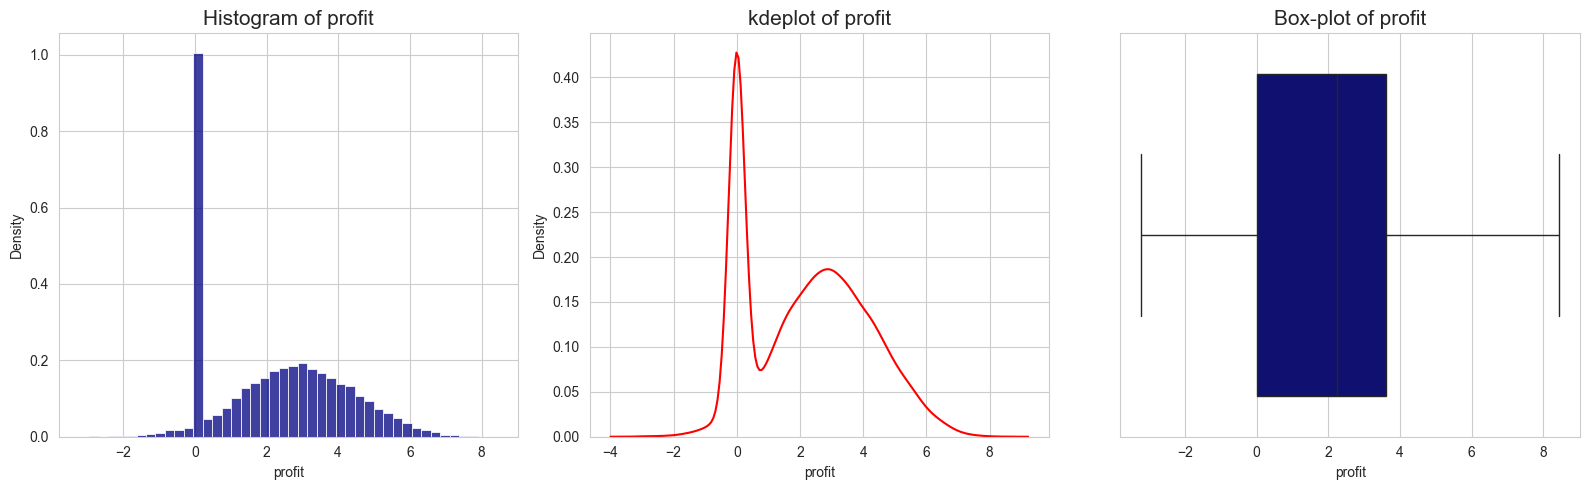

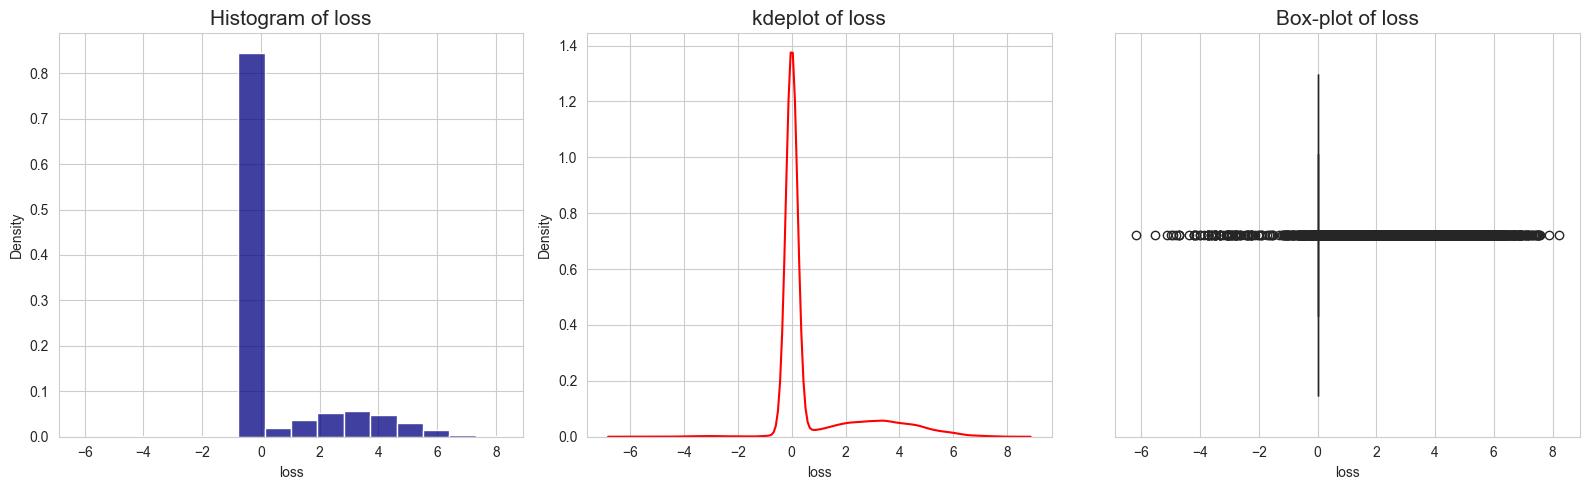

In [153]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
for i,col in enumerate(numerical_data):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data = df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data = df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\4162129051.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Greens')


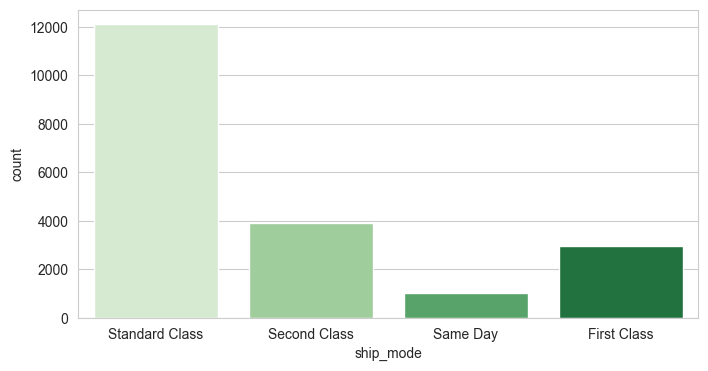

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\4162129051.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Greens')


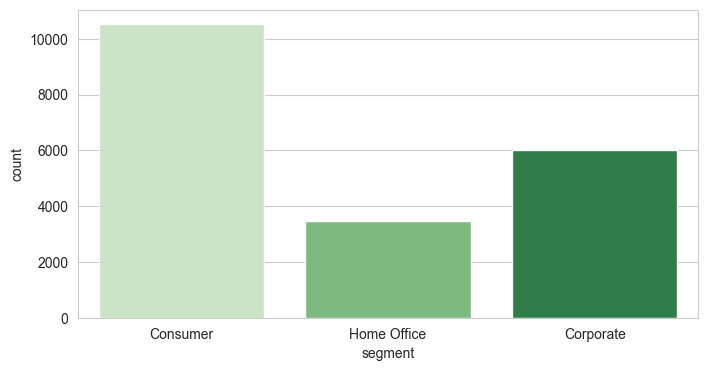

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\4162129051.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Greens')


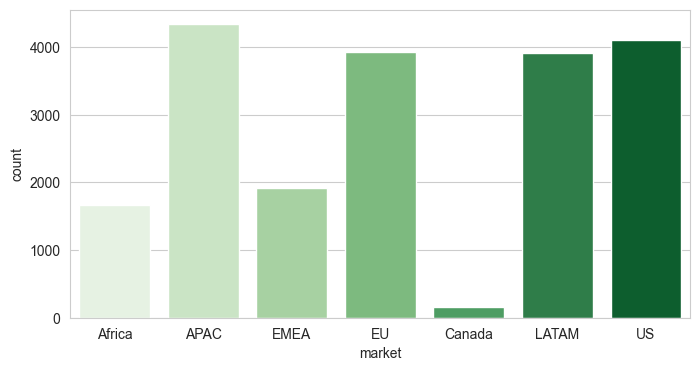

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\4162129051.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Greens')


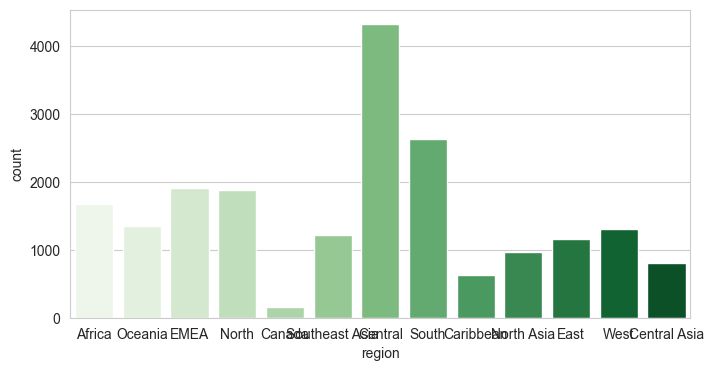

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\4162129051.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Greens')


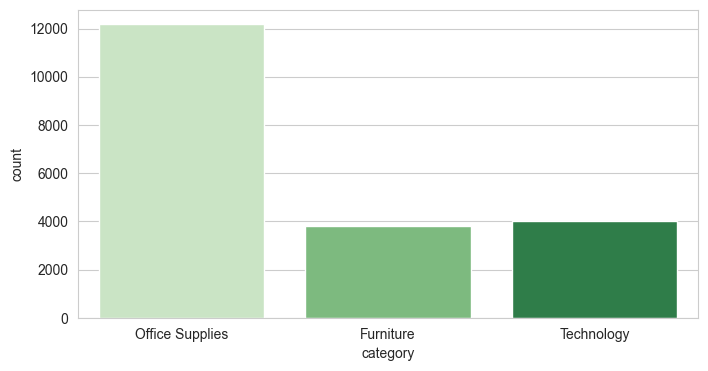

In [154]:
categorical_features = df[['ship_mode','segment', 'market','region','category']]
for col in categorical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

### Count of sub_category

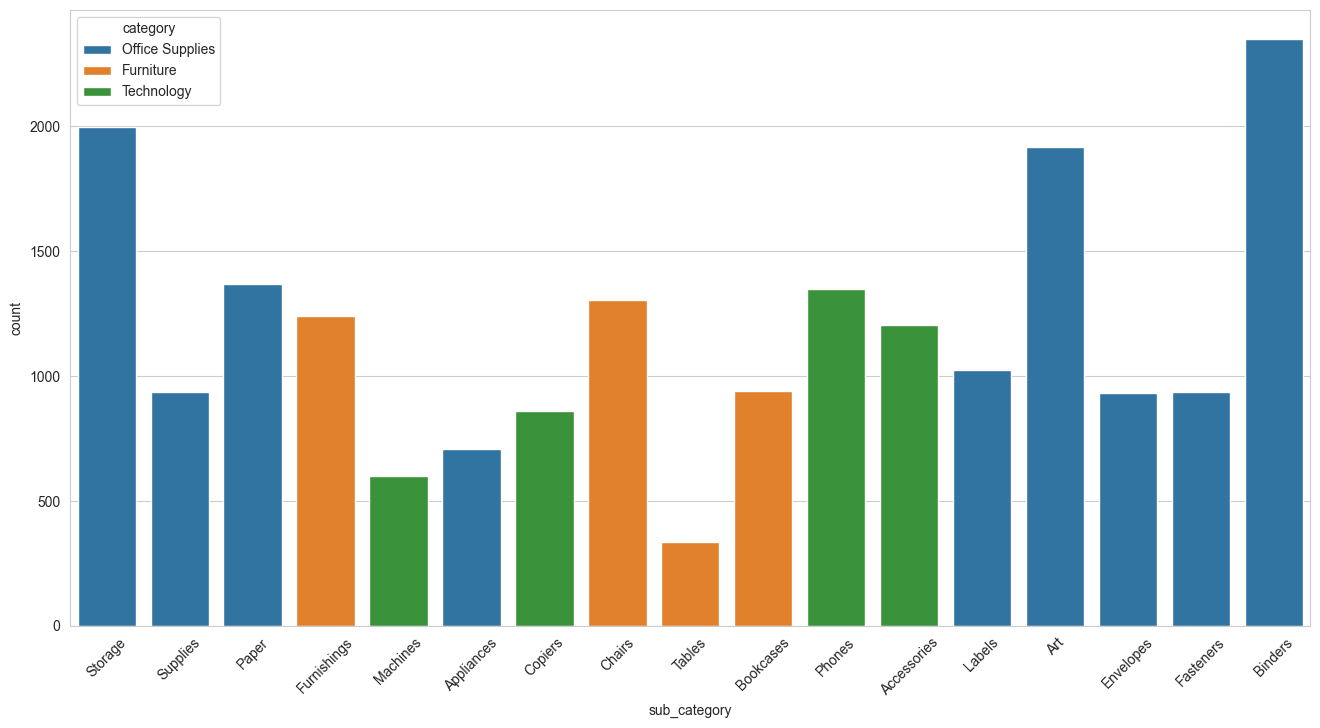

In [155]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.countplot(x='sub_category', hue='category', data=df)
plt.xticks(rotation=45)
plt.show()


1. **Majority of the customers prefer the Standard Class Shipment mode.**
2. **Most of the customers are from the Consumer segment.**
3. **Binders and storage are the leaders in Product Sub-Category.**
4. **Office Supplies is the best performing category,Furniture is the second best performing category,Technology is the least performing category**

### Distribution of Top 20 countries

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\3048511632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


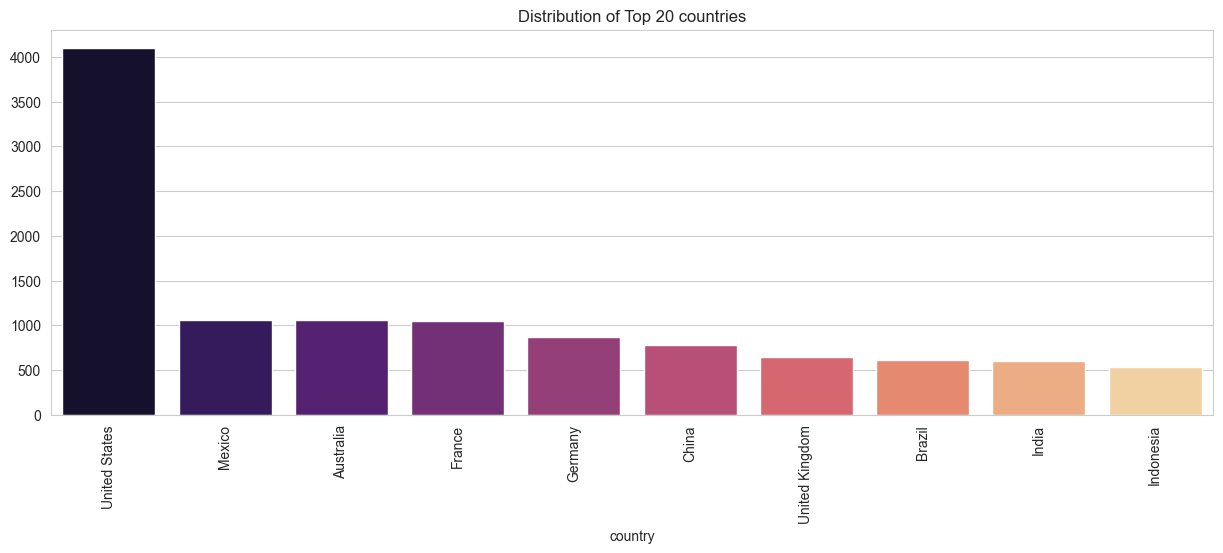

In [156]:
plt.figure(figsize=(15, 5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title("Distribution of Top 20 countries")
plt.xticks(rotation=90)
plt.show()

#### The bar plot shows that the United States has majority of transactions compared to other countries indicating that the U.S. is the primary market in this dataset.Germany, China, and several other countries have even lower counts, indicating that these are smaller or emerging markets for the company.

### Pair Plot

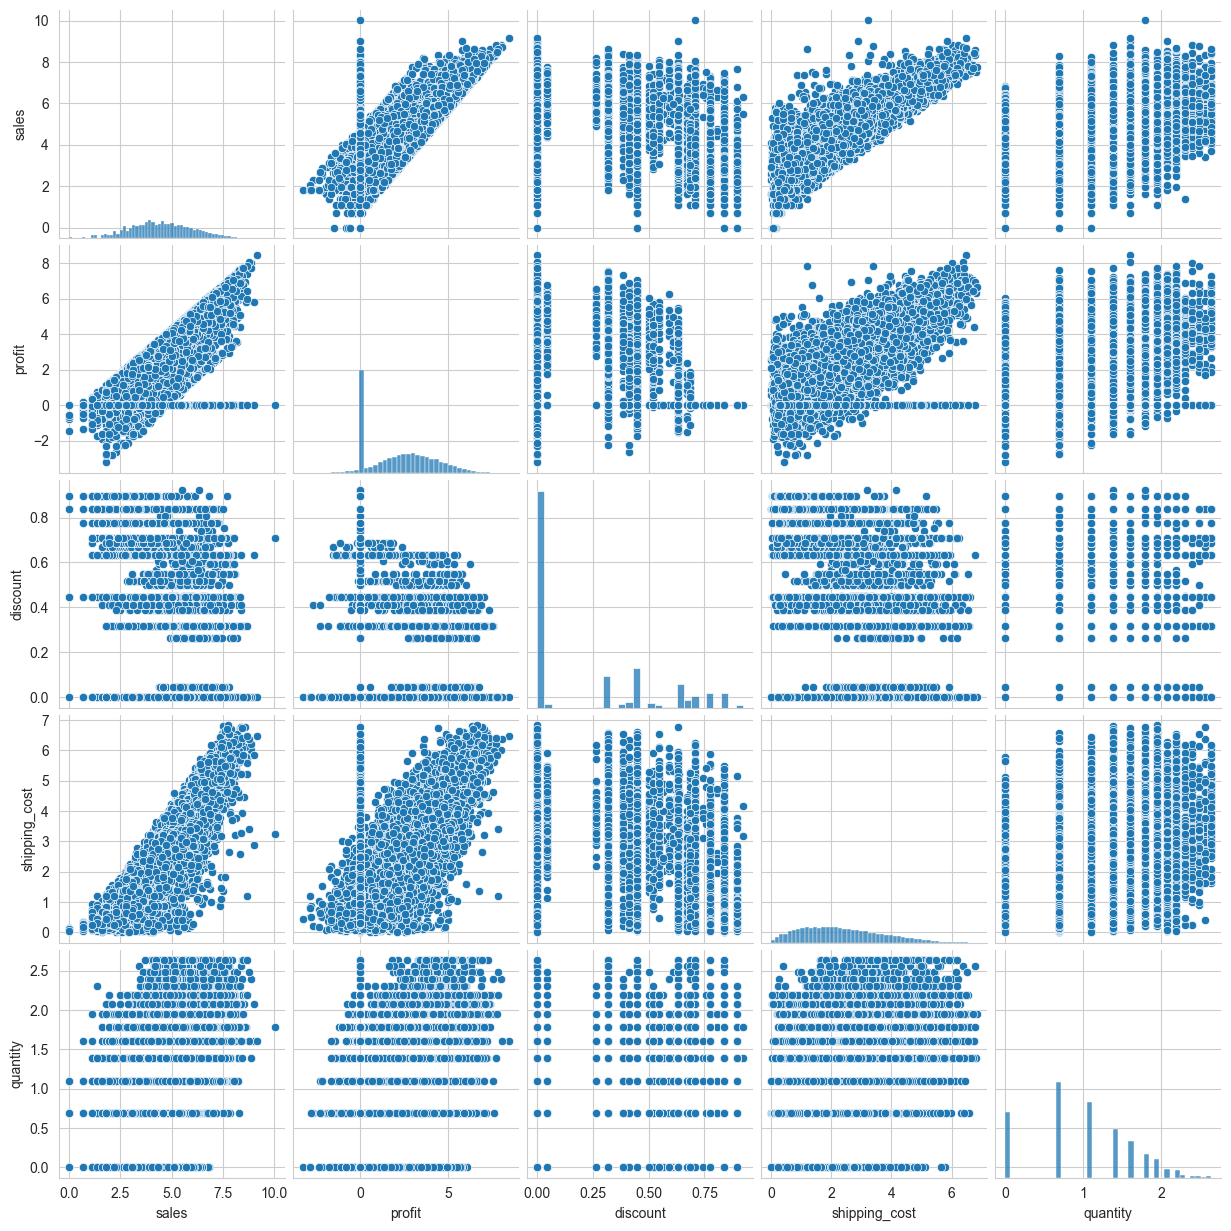

In [157]:
columns_to_plot = ['sales', 'profit', 'discount', 'shipping_cost','quantity']
sns.pairplot(df[columns_to_plot])
plt.show()

## Customer Analysis

In [158]:
# Check the unique customer segments
types_of_customer = df['segment'].unique()
print("Types of Customers:", types_of_customer)

# Count the number of customers in each segment
number_of_customers = df['segment'].value_counts().reset_index()
number_of_customers.columns = ['Customer Type', 'Total Customers']
print("Number of Customers in Each Segment:\n", number_of_customers)


Types of Customers: ['Consumer' 'Home Office' 'Corporate']
Number of Customers in Each Segment:
   Customer Type  Total Customers
0      Consumer            10517
1     Corporate             6023
2   Home Office             3460


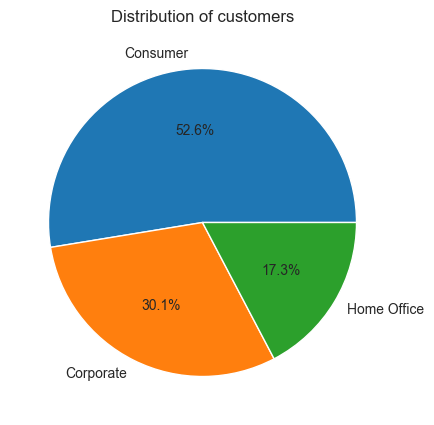

In [159]:
# Plot the pie chart
plt.pie(number_of_customers['Total Customers'], labels=number_of_customers['Customer Type'], autopct='%1.1f%%')

# Set pie chart labels
plt.title('Distribution of customers')
plt.show()

### Customers and sales

In [160]:
sales_per_category=df.groupby('segment')['sales'].sum().reset_index()
sales_per_category=sales_per_category.rename(columns={'segment':'Customer Type','sales':'Total Sales'})
print(sales_per_category)

  Customer Type  Total Sales
0      Consumer        47267
1     Corporate        27041
2   Home Office        15441


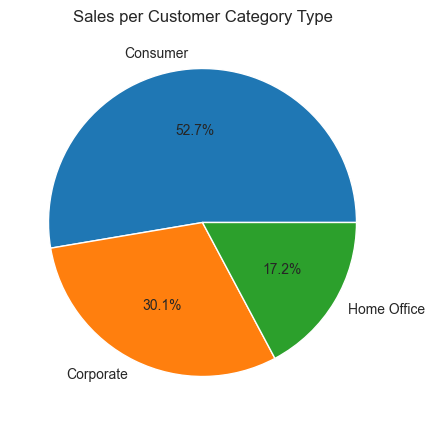

In [161]:
# Plot the pie chart
plt.pie(sales_per_category['Total Sales'], labels=sales_per_category['Customer Type'], autopct='%1.1f%%')

# Set pie chart labels
plt.title('Sales per Customer Category Type')
plt.show()

#### The largest portion of sales comes from the Consumer segment, accounting for 51.7% of the total sales.This indicates that individual consumers are the most significant contributors to the company's revenue.
#### The Corporate segment contributes 30.1% to the total sales, showing that businesses and organizations are also important customers, though not as dominant as individual consumers.
#### The Home Office segment, while smaller, could be a growing area.

### Bar plot of sales Vs profit


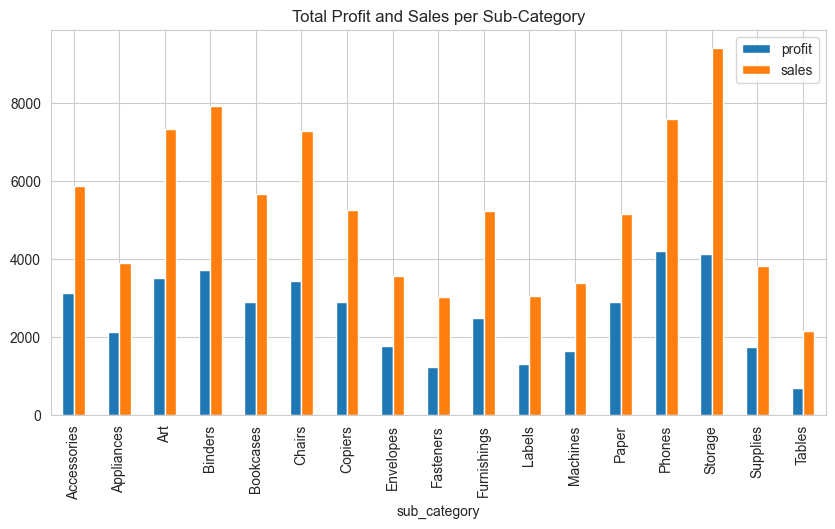

In [162]:
df.groupby('sub_category')[['profit', 'sales']].agg('sum').plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

#### Which are the most selling products?

In [163]:
products = df.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:10]
products

,quantity
product_name,
Staples,117
"Sanford Pencil Sharpener, Water Color",42
"Eldon File Cart, Single Width",37
"Cardinal Index Tab, Clear",34
"Avery Index Tab, Clear",32
"Stanley Pencil Sharpener, Water Color",31
"Tenex File Cart, Single Width",29
"Binney & Smith Pencil Sharpener, Water Color",29
"Cardinal 3-Hole Punch, Economy",28


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Cardinal Index Tab, Clear'),
  Text(4, 0, 'Avery Index Tab, Clear'),
  Text(5, 0, 'Stanley Pencil Sharpener, Water Color'),
  Text(6, 0, 'Tenex File Cart, Single Width'),
  Text(7, 0, 'Binney & Smith Pencil Sharpener, Water Color'),
  Text(8, 0, 'Cardinal 3-Hole Punch, Economy'),
  Text(9, 0, 'Boston Canvas, Fluorescent')])

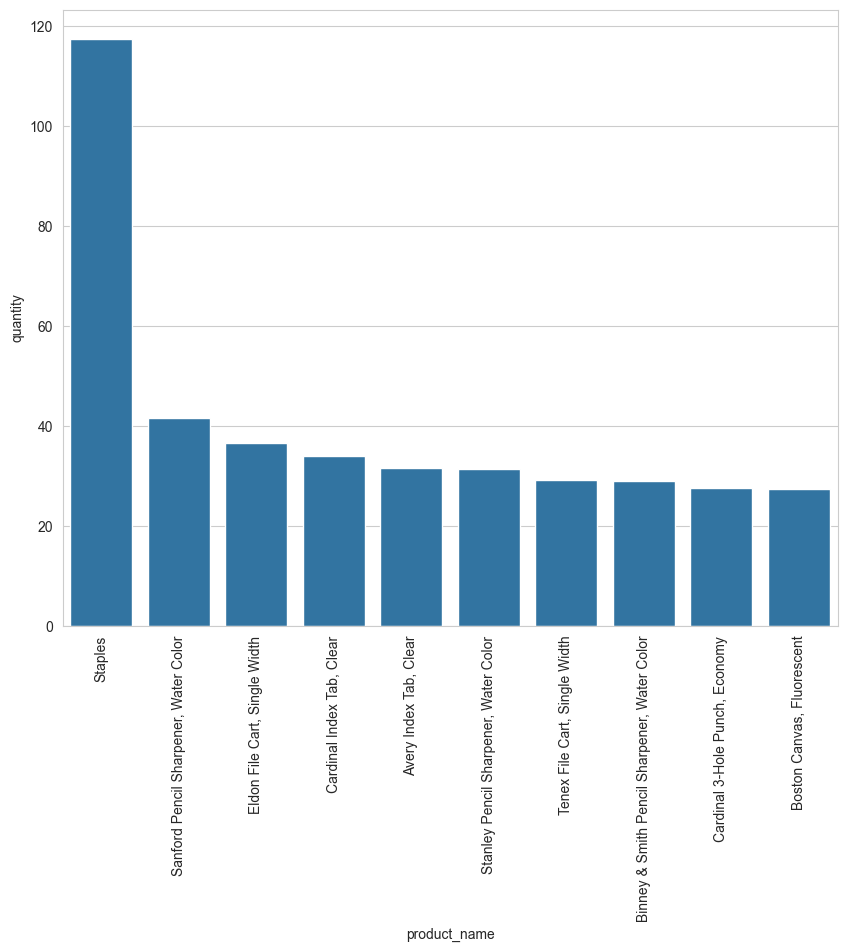

In [164]:
sns.barplot(x='product_name',y='quantity',data=products.reset_index())
plt.xticks(rotation = 'vertical')

### Which market sold the most products?

C:\Users\Najwa\AppData\Local\Temp\ipykernel_7888\3647872294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market',data=df, palette='rainbow')


<Axes: xlabel='market', ylabel='count'>

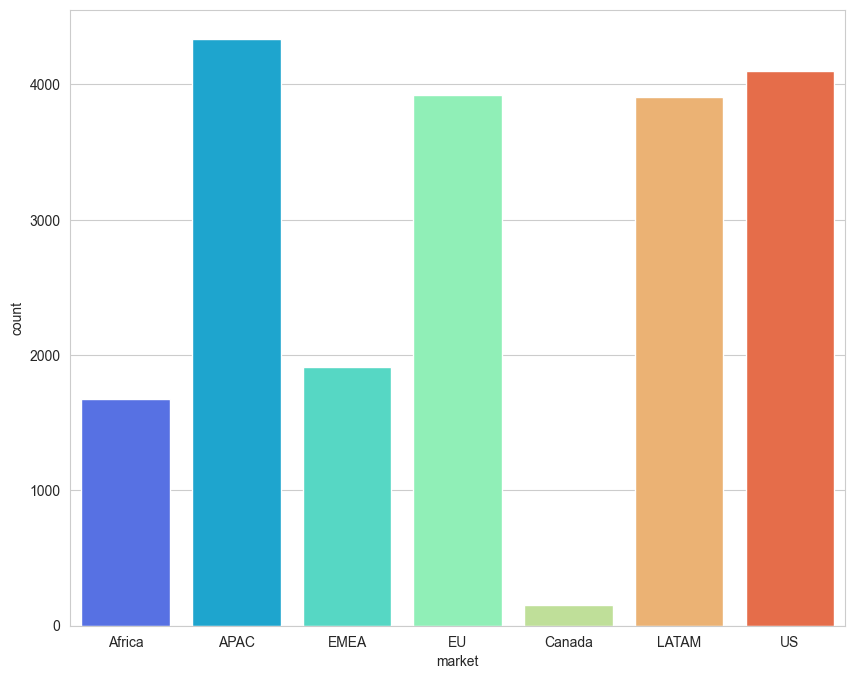

In [165]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=df, palette='rainbow')

## Feature Engineering

#### Categorical Encoding

In [166]:
print(df.columns)

Index(['order_id', 'ship_mode', 'customer_name', 'segment', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'order_priority', 'year', 'order_year', 'order_month',
       'order_day', 'ship_year', 'ship_month', 'ship_day', 'quantity',
       'discount', 'sales', 'shipping_cost', 'profit', 'loss'],
      dtype='object')


In [167]:
# Identify categorical columns (object dtype)
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the names of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['order_id', 'ship_mode', 'customer_name', 'segment', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'order_priority'],
      dtype='object')


In [168]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [169]:
categorical_columns=['order_id', 'ship_mode',
       'segment', 'state', 'country', 'market', 'region','customer_name','product_id',
       'category', 'sub_category', 'product_name','order_priority']

#Encoding categorical variables
nominal_columns =[  'order_id', 'ship_mode',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category','customer_name', 'product_name']
#One-hot encoding for nominal columns
nominal_columns_encoded = pd.get_dummies(df[nominal_columns],dtype=int)
nominal_columns_encoded

,order_id_AE-2011-9160,order_id_AG-2011-1070,order_id_AG-2011-1390,order_id_AG-2011-1440,order_id_AG-2011-2040,order_id_AG-2011-3090,order_id_AG-2011-3130,order_id_AG-2011-380,order_id_AG-2011-4410,order_id_AG-2011-4450,...,product_name_XtraLife ClearVue Slant-D Ring Binders by Cardinal,product_name_Zebra GX420t Direct Thermal/Thermal Transfer Printer,product_name_Zebra ZM400 Thermal Label Printer,product_name_Zebra Zazzle Fluorescent Highlighters,product_name_Zipper Ring Binder Pockets,product_name_i.Sound Portable Power - 8000 mAh,"product_name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",product_name_iOttie HLCRIO102 Car Mount,product_name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,product_name_netTALK DUO VoIP Telephone Service
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
ordinal_columns=['order_priority']
#Label encoding for ordinal columns
ordinal_columns_encoded = df[ordinal_columns].copy()
for column in ordinal_columns_encoded.columns:
    label_encoder = LabelEncoder()
    ordinal_columns_encoded[column] = label_encoder.fit_transform(ordinal_columns_encoded[column])
ordinal_columns_encoded

,order_priority
0,3
1,3
2,1
3,1
4,3
...,...
19995,3
19996,3
19997,1
19998,3


In [171]:
#Replace original columns with encoded columns
salesdata_encoded = pd.concat([nominal_columns_encoded, ordinal_columns_encoded], axis=1)


#Concatenate encoded columns with remaining columns
df = pd.concat([df.drop(columns=categorical_columns), salesdata_encoded], axis=1)
df.head

<bound method NDFrame.head of        year  order_year  order_month  order_day  ship_year  ship_month  \
0      2011        2011            1          1       2011           1   
1      2011        2011            1          1       2011           1   
2      2011        2011            1          1       2011           1   
3      2011        2011            1          1       2011           1   
4      2011        2011            1          1       2011           1   
...     ...         ...          ...        ...        ...         ...   
19995  2013        2013            1          2       2013           1   
19996  2013        2013            1          2       2013           1   
19997  2013        2013            1          2       2013           1   
19998  2013        2013            1          2       2013           1   
19999  2013        2013            1          2       2013           1   

       ship_day  quantity  discount  sales  ...  \
0             6         1     

### Data Scaling

In [172]:
# Split features and target variable
X = df.drop(['sales'], axis=1)
y = df['sales']
print (X)
print (y)

       year  order_year  order_month  order_day  ship_year  ship_month  \
0      2011        2011            1          1       2011           1   
1      2011        2011            1          1       2011           1   
2      2011        2011            1          1       2011           1   
3      2011        2011            1          1       2011           1   
4      2011        2011            1          1       2011           1   
...     ...         ...          ...        ...        ...         ...   
19995  2013        2013            1          2       2013           1   
19996  2013        2013            1          2       2013           1   
19997  2013        2013            1          2       2013           1   
19998  2013        2013            1          2       2013           1   
19999  2013        2013            1          2       2013           1   

       ship_day  quantity  discount  shipping_cost  ...  \
0             6         1         0              4  

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Initialize StandardScaler
scaler.fit(X)
X[:]=scaler.transform(X)

In [174]:
X

,year,order_year,order_month,order_day,ship_year,ship_month,ship_day,quantity,discount,shipping_cost,...,product_name_Zebra GX420t Direct Thermal/Thermal Transfer Printer,product_name_Zebra ZM400 Thermal Label Printer,product_name_Zebra Zazzle Fluorescent Highlighters,product_name_Zipper Ring Binder Pockets,product_name_i.Sound Portable Power - 8000 mAh,"product_name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",product_name_iOttie HLCRIO102 Car Mount,product_name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,product_name_netTALK DUO VoIP Telephone Service,order_priority
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
19996,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
19997,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Data Splitting

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 23525), (4000, 23525), (16000,), (4000,))

### ML Model Implementation

### **Linear Regression**

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [177]:
y_test[:10]

10650   3
2041    3
8668    3
1114    3
13902   5
11963   4
11072   5
3002    4
19771   6
8115    7
Name: sales, dtype: float64

In [178]:
y_pred[:10]

array([ 2.92684937e+00,  1.31604798e+10,  1.06434656e+10, -8.46381683e+09,
       -2.87950174e+09, -3.14279134e+09, -4.84709247e+09, -4.13394899e+09,
        6.01681519e+00,  6.66267395e+00])

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print(mse)
print(r2)

17634653552.44864
4.702781265176976e+21
-2.2231469795212172e+21


<span style="font-family: Arial; font-size: 14pt;">**Feature Selection:** </span>

In [ ]:
#using Recurssive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the estimator (model)
estimator = LinearRegression()

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=5)

# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
selected_features_rfe